In [2]:
import pandas as pd
from ast import literal_eval

In [20]:
df = pd.read_pickle('../../results/schembl_summs_v5_final_fp.pkl')


/Users/ckosonocky/opt/anaconda3/envs/chef/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/67/6sj3_z4943v4gy9hc27k5vv80000gq/T/ipykernel_2721/3026954288.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hcv['labels'] = labels


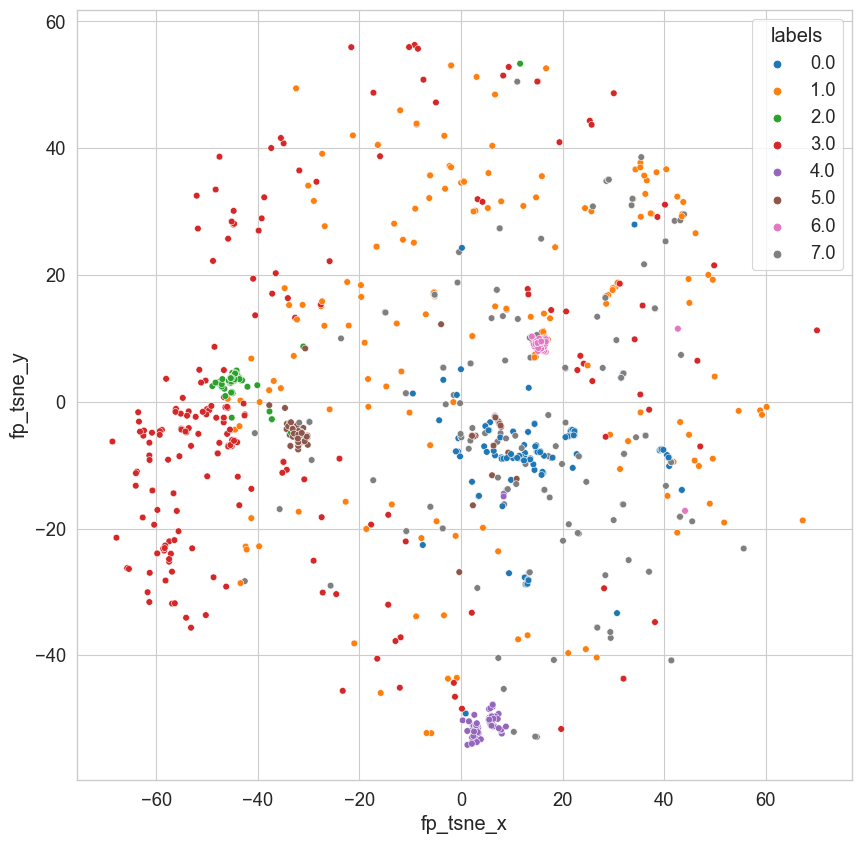

In [143]:
primary_label = 'hcv'

# subset df of only those with 'hcv' in the summarization set
df_hcv = df[df['summarizations'].apply(lambda x: primary_label in x)]

# kmeans clustering on the hcv subset by fingerprint
from sklearn.cluster import KMeans

X = df_hcv['fingerprint'].tolist()

kmeans = KMeans(n_clusters=8, random_state=42, ).fit(X)
labels = kmeans.labels_
df_hcv['labels'] = labels

# plot the clusters
df_tsne = pd.read_csv("./chef_v5_fp_tsne_p500.csv")

# merge the hcv labels with tsne on cid
df_tsne_hcv = df_tsne.merge(df_hcv[['cid', 'labels']], on='cid', how='left')

df_tsne_hcv['fp_tsne_x'] = df_tsne_hcv['fp_tsne_x'].apply(float)
df_tsne_hcv['fp_tsne_y'] = df_tsne_hcv['fp_tsne_y'].apply(float)

# plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

# plot the clusters
plt.figure(figsize=(10,10))
sns.scatterplot(x='fp_tsne_x', y='fp_tsne_y', hue='labels', data=df_tsne_hcv, legend='full', palette='tab10')
# plt.title('DBSCAN Clustering of HCV Summarizations')
# plt.title('DBSCAN Clustering of 5-ht Summarizations')
plt.savefig(f'./kmeans_{primary_label}_summs.png', dpi=300)
plt.show()
df_tsne_hcv[["smiles", "cid", "summarizations", "labels"]].to_csv(f"./kmeans_{primary_label}_df.csv", index=False)

df_tsne_hcv['summarizations'] = df_tsne_hcv['summarizations'].apply(literal_eval)
df_tsne_hcv['summarizations'] = df_tsne_hcv['summarizations'].apply(set)

In [144]:
from collections import Counter

# top 15 terms in each cluster
top_terms = []

for i in range(8):
    counter = Counter()
    sub_df = df_tsne_hcv[df_tsne_hcv['labels'] == i]
    # count each term in summarizations
    for summ in sub_df['summarizations']:
        counter.update(summ)

    # print the top 10 terms
    print(counter.most_common(20))
    top_terms.append(counter.most_common(20))

# save to csv
pd.DataFrame(top_terms).to_csv(f"./kmeans_{primary_label}_top_terms.csv", index=False)

[('hcv', 188), ('inhibitor', 169), ('antiviral', 116), ('treatment', 93), ('hepatitis', 81), ('c', 81), ('ns', 64), ('agent', 57), ('polymerase', 55), ('compound', 46), ('viral', 38), ('therapeutic', 36), ('activity', 35), ('replication', 31), ('rna', 18), ('infection', 16), ('virus', 15), ('derivative', 15), ('therapy', 14), ('anti', 14)]
[('hcv', 191), ('inhibitor', 152), ('antiviral', 136), ('treatment', 85), ('ns', 67), ('compound', 51), ('hepatitis', 50), ('c', 50), ('replication', 33), ('polymerase', 32), ('viral', 30), ('agent', 25), ('infection', 21), ('protein', 20), ('therapeutic', 18), ('protease', 17), ('virus', 16), ('prevention', 13), ('rna', 12), ('inhibitory', 10)]
[('hcv', 105), ('inhibitor', 101), ('protease', 87), ('treatment', 68), ('hepatitis', 64), ('c', 64), ('compound', 44), ('peptide', 35), ('antiviral', 31), ('chemo', 20), ('novel', 20), ('ns', 19), ('serine', 15), ('pharmaceutical', 12), ('treat', 12), ('virus', 10), ('cathepsin', 8), ('formulation', 7), ('co